In [1]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='mikeriano', api_key='Oc2fpiJBqV7QXGSsetKV')


In [2]:
f_states = pd.read_csv("finance_states.csv")

In [3]:
#Getting a sample of what our dataset looks like
f_states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,1992_ALASKA,ALASKA,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


In [4]:
#Getting a list of what my columns are labeled
list(f_states)

['PRIMARY_KEY',
 'STATE',
 'YEAR',
 'ENROLL',
 'TOTAL_REVENUE',
 'FEDERAL_REVENUE',
 'STATE_REVENUE',
 'LOCAL_REVENUE',
 'TOTAL_EXPENDITURE',
 'INSTRUCTION_EXPENDITURE',
 'SUPPORT_SERVICES_EXPENDITURE',
 'OTHER_EXPENDITURE',
 'CAPITAL_OUTLAY_EXPENDITURE']

In [5]:
#Dropping my null column as it's not useful in this analyzation and making in effective immediately
f_states.dropna(subset=['ENROLL'],axis = 0,inplace = True)

In [6]:
#Dropping the primary Key column as it's a reiteration of state/year
f_states.drop(columns=["PRIMARY_KEY"],inplace = True)
f_states = f_states.round(decimals=2)

In [7]:
#Getting a mean of each states total expenditure throughout the years
state_grpby = f_states.groupby("STATE")['TOTAL_EXPENDITURE'].mean()

In [8]:
#Rounding our decimals to 2 places
state_grpby.round(decimals=2)
state_grpby.head()

STATE
ALABAMA       5.816799e+06
ALASKA        1.852882e+06
ARIZONA       6.680881e+06
ARKANSAS      3.789589e+06
CALIFORNIA    5.746073e+07
Name: TOTAL_EXPENDITURE, dtype: float64

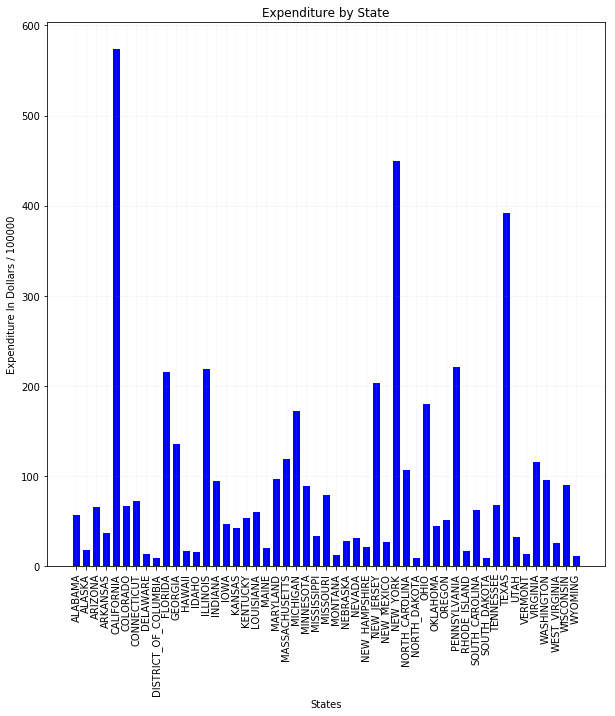

In [9]:
#Creating a plot to get a visual of the average expenditure by state
grp_by_df = pd.DataFrame(state_grpby)
grp_by_df["Expenditure_100000"]=grp_by_df['TOTAL_EXPENDITURE']/100000
grp_by_df.round(2)
grp_by_df = grp_by_df.reset_index()
plt.figure(figsize=(10,10))
plt.title("Expenditure by State")
plt.xlabel("States")
plt.ylabel("Expenditure In Dollars / 100000")
plt.grid(alpha=.10)
plt.xticks(rotation=90,horizontalalignment="center")
plt.style.use("dark_background")
plt.bar(grp_by_df['STATE'],grp_by_df['Expenditure_100000'],color = "blue",edgecolor='white')
plt.show()

In [10]:
#same idea with the expenditures but by revenue
tot_rev = f_states.groupby("STATE")['TOTAL_REVENUE'].mean()

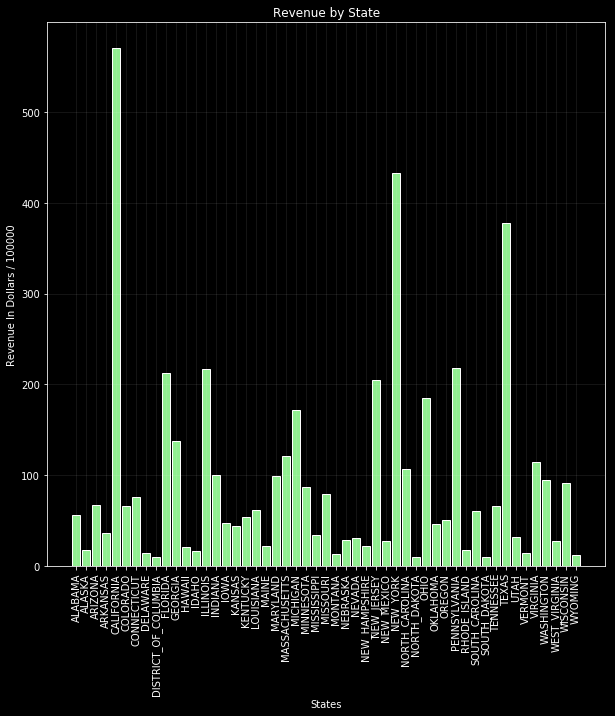

In [11]:
#Average visuzliation for revenue
tot_rev = pd.DataFrame(tot_rev)
tot_rev["Revenue_100000"]=tot_rev['TOTAL_REVENUE']/100000
tot_rev.round(2)
tot_rev = tot_rev.reset_index()
plt.figure(figsize=(10,10))
plt.title("Revenue by State")
plt.xlabel("States")
plt.ylabel("Revenue In Dollars / 100000")
plt.grid(alpha=.10)
plt.xticks(rotation=90,horizontalalignment="center")
plt.style.use("dark_background")
plt.bar(tot_rev['STATE'],tot_rev['Revenue_100000'],color = "lightgreen",edgecolor='white')
plt.show()

In [12]:
grp_by_df["Revenue to Expenditure Difference"] = tot_rev["Revenue_100000"] - grp_by_df["Expenditure_100000"]

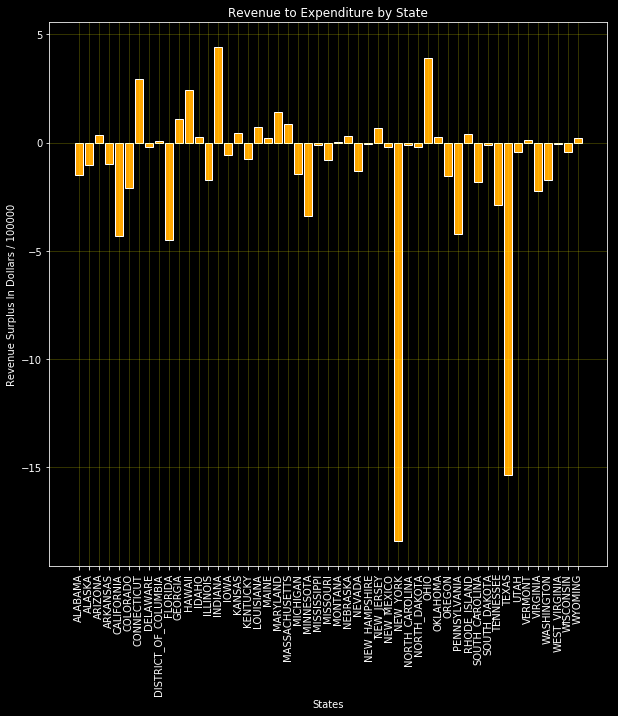

In [13]:
#Revenue to expenditure difference.  Looking to see what states maintain positive balances vs negative.
grp_by_df.round(2)
plt.figure(figsize=(10,10))
plt.title("Revenue to Expenditure by State")
plt.xlabel("States")
plt.ylabel("Revenue Surplus In Dollars / 100000")
plt.grid(alpha=.25,color="yellow")
plt.xticks(rotation=90,horizontalalignment="center")
plt.style.use("dark_background")
plt.bar(grp_by_df['STATE'],grp_by_df['Revenue to Expenditure Difference'],color = "orange",edgecolor='white')
plt.show()

In [14]:
#Same grasph as above but done through plotly.  
data = [go.Bar(
            x=grp_by_df["STATE"],
            y=grp_by_df["Revenue to Expenditure Difference"]
    )]

py.iplot(data, filename='Rev to Exp')

In [15]:
base_for_graph = grp_by_df["Expenditure_100000"]*-1

In [16]:
#Comparison graph in ploty to indicate the visualization of differences between the revenues to expenditures
data = [
    go.Bar(
        x = grp_by_df["STATE"],
        y = grp_by_df["Expenditure_100000"],
        base = base_for_graph,
 
 
        marker = dict(
          color = 'green'
        ),
        name = 'Expenses'
    ),
    go.Bar(
        x = tot_rev["STATE"],
        y = tot_rev["Revenue_100000"],
        base = 0,
        marker = dict(
          color = 'blue'
        ),
        name = 'revenue'
    )
       
]




fig = go.Figure(data=data)
py.iplot(fig, filename='revenue to expenses')

In [17]:
sum_by_state = f_states.groupby("STATE")[["TOTAL_REVENUE",'FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE',\
 'SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']].sum()

In [18]:
sum_by_state = sum_by_state.reset_index()

In [123]:
#checkikng to make sure this is what i'd like to use for my future plots.
sum_by_state.head()

,STATE,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,ALABAMA,135967488,14789545,78045778,43132165,139603174,71948530,41106110,11071395.0,12770436
1,ALASKA,41951400,6182878,26022251,9746271,44469172,21807941,15400212,1435726.0,4985925
2,ARIZONA,161177974,19365057,67912519,73900398,160341148,74176101,50820141,8025837.0,20480747
3,ARKANSAS,88573140,10006724,64131910,14434506,90950127,46227747,27555433,6089258.0,8368551
4,CALIFORNIA,1368719957,142642180,757685593,468392184,1379057451,682715475,397409098,69779685.0,151916262


In [125]:
#Checking index to make sure it's what I want to use in a plot. 
sum_by_state.loc[0]

STATE                               ALABAMA
TOTAL_REVENUE                     135967488
FEDERAL_REVENUE                    14789545
STATE_REVENUE                      78045778
LOCAL_REVENUE                      43132165
TOTAL_EXPENDITURE                 139603174
INSTRUCTION_EXPENDITURE            71948530
SUPPORT_SERVICES_EXPENDITURE       41106110
OTHER_EXPENDITURE               1.10714e+07
CAPITAL_OUTLAY_EXPENDITURE         12770436
Name: 0, dtype: object

In [114]:
#Created a function to graph each state's index and get revenue percentages.
def get_pie_revenue(x):
    data = []
    for value in sum_by_state.loc[x]:
        data.append(value)
                
    federal_revenue_perc = data[2]/data[1] * 100
    federal_revenue_perc = federal_revenue_perc.round(decimals=2)
    state_revenue_perc = data[3]/data[1] * 100
    state_revenue_perc =  state_revenue_perc.round(decimals=2)
    local_revenue_perc = data[4]/data[1] * 100
    local_revenue_perc = local_revenue_perc.round(decimals=2)

    print(f"Here is your indexed data for {data[0]},{data[1:]}")
    print(f"Federal % {federal_revenue_perc}")
    print(f"State % {state_revenue_perc}")
    print(f"Local % {local_revenue_perc}")
    
    labels = 'Federal Revenue %', 'State Revenue %', 'Local Revenue %'
    sizes = [federal_revenue_perc,state_revenue_perc,local_revenue_perc]
    explode = (0, 0.1, 0)
    colors = "Red","Blue","Orange"

    plt.pie(sizes,labels=labels, explode=explode,colors=colors,textprops={'color':"black"},autopct='%1.1f%%',
        shadow=True, startangle=90)
    plt.axis('equal')
    plt.style.use("seaborn")
    plt.title(f"Total revenue make-up / of {data[0]}.")
    plt.subplots_adjust(left=0.5)
    
    
    plt.show()

Here is your indexed data for SOUTH_CAROLINA,[146615059, 14221798, 69395449, 62997812, 150994680, 71931909, 45166083, 8097325.0, 19807403]
Federal % 9.7
State % 47.33
Local % 42.97


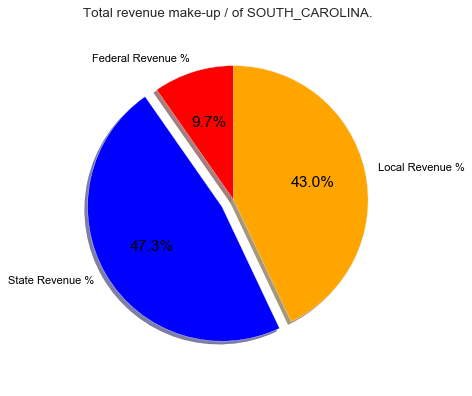

In [115]:
#You may now call each index to see a breakdown of percentages in revenue per state. 
get_pie_revenue(40)

In [120]:
#Created a function to graph each state's index and get expense percentages mimiced from aboved.
def get_pie_expenses(x):
    data = []
    for value in sum_by_state.loc[x]:
        data.append(value)
                
    instruction_exp_perc = data[6]/data[5] * 100
    instruction_exp_perc = instruction_exp_perc.round(decimals=2)
    sppt_svcs_exp_perc = data[7]/data[5] * 100
    sppt_svcs_exp_perc =  sppt_svcs_exp_perc.round(decimals=2)
    other_exp_perc = data[8]/data[5] * 100
    other_exp_perc = other_exp_perc.round(decimals=2)
    cap_outlay_perc = data[9]/data[5] * 100
    cap_outlay_perc = cap_outlay_perc.round(decimals=2)
    
    print(f"Here is your indexed data for {data[0]},{data[5:]}")
    print(f"Instructional Expenditure % {instruction_exp_perc}")
    print(f"Support Services Expenditure % {sppt_svcs_exp_perc}")
    print(f"Other Expenditures % {other_exp_perc}")
    print(f"Capital Outlay Expenditures % {cap_outlay_perc}")
    
    labels = "Instruction Expense %", "Support Services %","Other Expense %","Capital Outlay Expense %"
    sizes = [instruction_exp_perc,sppt_svcs_exp_perc,other_exp_perc,cap_outlay_perc]
    explode = (0, 0.1, 0,0)
    colors = "Red","Blue","Orange","Yellow"

    plt.pie(sizes,labels=labels, explode=explode,colors=colors,textprops={'color':"black"},autopct='%1.1f%%',
        shadow=True, startangle=90)
    plt.axis('equal')
    plt.style.use("seaborn")
    plt.title(f"Total expenditure make-up / of {data[0]}.")
    plt.subplots_adjust(left=0.5)
    
    
    plt.show()

Here is your indexed data for ALABAMA,[139603174, 71948530, 41106110, 11071395.0, 12770436]
Instructional Expenditure % 51.54
Support Services Expenditure % 29.44
Other Expenditures % 7.93
Capital Outlay Expenditures % 9.15


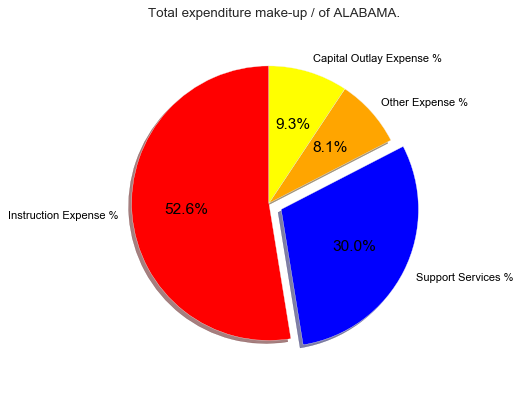

In [121]:
get_pie_expenses(0)